In [8]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
import cv2
#A=imread(os.path.join('up.bmp'))
#B=np.mean(A,-1)
image=cv2.imread('../traf.bmp')


In [9]:
(B, G, R) = cv2.split(image)
cop=(B, G, R)
coeffs=np.array([0,0,0] ,dtype=object)
arr=np.array([0,0,0] ,dtype=object)
coeff_slice =np.array([0,0,0] ,dtype=object)
Csort=np.array([0,0,0] ,dtype=object)
thresh=np.array([0,0,0] ,dtype=object)
ind=np.array([0,0,0] ,dtype=object)
coeffs_filt=np.array([0,0,0] ,dtype=object)
Arecon=np.array([0,0,0] ,dtype=object)

In [10]:
keep=0.02
for i in range (3):   
    n=2
    w='haar'
    coeffs[i]=pywt.wavedec2(cop[i],wavelet=w,level=n)
    arr[i],coeff_slice[i] =pywt.coeffs_to_array(coeffs[i])
    Csort[i]=np.sort(np.abs(arr[i].reshape(-1)))
    thresh[i]=Csort[i][int(np.floor((1-keep)*len(Csort[i])))]
    ind[i]=np.abs(arr[i])>thresh[i]
    coeffs_filt[i]=pywt.array_to_coeffs(arr[i]*ind[i],coeff_slice[i],output_format='wavedec2')
    Arecon[i]=pywt.waverec2( coeffs_filt[i],wavelet=w)
    
    
    

In [11]:
merged = cv2.merge([Arecon[0], Arecon[1], Arecon[2]])
cv2.imwrite('haar_min1.png', merged)
cv2.waitKey()

-1

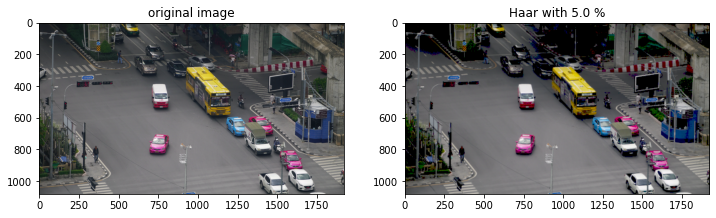

In [46]:
#show
Areco=cv2.cvtColor(merged.astype('uint8'),cv2.COLOR_BGR2RGB)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(12, 12))
fig.add_subplot(1, 2, 1).set_title("original image")
plt.imshow(image_rgb)
fig.add_subplot(1, 2, 2).set_title(f"Haar with {keep*100} %")
plt.imshow(Areco)
#fig.savefig("haar0.05.png")

In [47]:
from math import log10
def PSNR(original, compressed):
    diff=(original-compressed)
    mse=np.mean((original-compressed)**2)
    max_pixel=255
    psnr=20*log10(max_pixel/((mse)**(1/2)))
    return psnr
    


x=PSNR(image_rgb,Areco)
print(x)



31.434800874947513


In [48]:
def tobin(img):
    im_gray =cv2.cvtColor(img.astype("uint8"),cv2.COLOR_BGR2GRAY)
   
    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite('bw_img.png', im_bw)

In [49]:
tobin(merged)